## Demonstratoin of EMG Indicator Relationship with Strain

In this notebook, I demo that our chosen indicator of strain injury, the average high-frequency PSD of an EMG, is a good indicator of strain. 

We collect data while subjects clench their hand strongly with maximal grip exertion and observe the change in the EMG indicator statistic over time. 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  
from scipy import stats 
import uncertainties as unc
import uncertainties.unumpy as unp
df = pd.read_excel("_data/Validation Data.xlsx") 
data = df.to_numpy()

In [16]:
print("Validation Data:")
df

Validation Data:


,Time,AverageExtensor,AverageFlexor,StandardDev Extensor,StandardDev Flexor
0,0,2.180952,1.388414,0.689132,0.626056
1,1,1.871641,0.982701,0.613529,0.448125
2,2,1.576580,1.402149,0.333633,0.308973
3,3,1.307387,1.348856,0.903853,0.749291
4,4,1.123944,1.153611,0.901007,0.268027
5,5,1.139771,1.468687,0.675131,1.055553
6,6,1.361938,0.660053,1.348512,0.845283
7,7,1.106798,1.011276,0.586705,0.884075
8,8,1.232022,0.914680,0.157152,0.353176
9,9,0.596450,0.986553,0.584054,0.886424


In [44]:
def regressionStats(x, y, xName, xUnit, yName, yUnit, popType):
    # get R^2 value
    corrcoef = np.corrcoef(x, y)
    corrxy = corrcoef[0,1]
    r2 = corrxy**2

    # get regression parameter values from scipy library function
    def f(x, a, b):
        return a * x + b
    poptimal, pcovariance = curve_fit(f, x, y)
    a = poptimal[0]
    b = poptimal[1]

    # calculate parameters 95% confidence interval
    aCI ,bCI = unc.correlated_values(poptimal, pcovariance)

    # calculate regression 95% confidence interval
    xReg = np.linspace(min(x), max(x), 100)
    yReg = aCI*xReg + bCI
    nomReg = unp.nominal_values(yReg)
    stdReg = unp.std_devs(yReg)

    # plot
    plt.plot(x, y, 'o', c='blue', label='Data')
    plt.plot(x, a*x + b, c='black', label='Regression Line')
    plt.plot(xReg, nomReg - 1.96 * stdReg, c='red', label='95% Confidence Region')
    plt.plot(xReg, nomReg + 1.96 * stdReg, c='red')
    plt.title("Normalized Power v. Time for Extensor Radialis Brevis")
    plt.ylabel(yName + " (" + yUnit + ")")
    plt.xlabel(xName + " (" + xUnit + ")")
    plt.ylim((-2,3))
    plt.legend(loc='best')
    plt.savefig('extensorCI.png', dpi=300)
    plt.show()
    
    # print r2 and parameter confidence intervals
    print("R Squared:", r2)
    print('Regresion Parameter means with 95% Confidence Interval:')
    print('slope (m): ' + str(aCI))
    print('intercept (b): ' + str(bCI))
    
    # print data interpretation message
    r2Percent = round(r2*100,2)
    if (r2 < 0.5):
        print("\nINTERPRETATION: The R^2 value shows that only " + str(r2Percent) + "% of the variability in "
              + yName + " can be explained by " + xName + ".")
    elif (r2 < 0.8): 
        print('\nINTERPRETATION: The R^2 value shows that ' + str(r2Percent) + '% of the variability in '
              + str(yName) + ' can be explained by ' + str(xName) + '.')
    else: 
        print('\nINTERPRETATION: The R^2 value shows that a large percent (' + str(r2Percent) + '%) of the variability in '
              + str(yName) + ' can be explained by ' + str(xName) + '.')

In [32]:
def ttestStat(metric, d1, d2, sigLevel):
    statistic, pvalue = stats.ttest_ind(d1, d2, equal_var = False)

    print("HYPOTHESES:")
    print("Null Hypothesis: \u03BC Normal " + metric + " = \u03BC SA " + metric)
    print("Alternative Hypothesis: \u03BC Normal " + metric + " != \u03BC SA " + metric)
    print("Significance level: \u03B1 = " + str(sigLevel) + "\n")

    print("TEST: 2-sided t-test with unknown, unequal variance\n")


    print("RESULT: t-stat = " + str(statistic) + ", p-value = " + str(pvalue) + "\n")

    if (pvalue < sigLevel):
        print("CONCLUSION: Since p < \u03B1 = " + str(sigLevel) + ", we reject the null hypothesis." + 
              " Thus, there is sufficient evidence to believe that the populations have different mean " + metric + ".")
    else:
        print("CONCLUSION: Since p > \u03B1 = " + str(sigLevel) + ", we fail to reject the null hypothesis." + 
              " Thus, there is insufficient evidence that the populations have different mean " + metric + ".")

    plt1 = sns.violinplot(x='popType',y=metric, data=alldf)

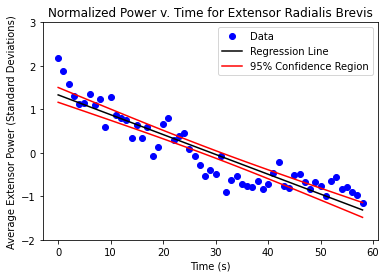

R Squared: 0.8455057951261857
Regresion Parameter means with 95% Confidence Interval:
slope (m): -0.0456+/-0.0026
intercept (b): 1.33+/-0.09

INTERPRETATION: The R^2 value shows that a large percent (84.55%) of the variability in Average Extensor Power can be explained by Time.


In [45]:
# Normal HR vs. RMSSD
regressionStats(df.Time, df.AverageExtensor, "Time", "s", "Average Extensor Power", "Standard Deviations", "Normalized")

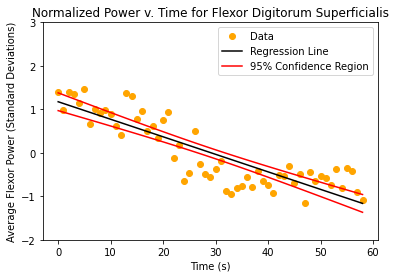

R Squared: 0.7476548966099626
Regresion Parameter means with 95% Confidence Interval:
slope (m): -0.0403+/-0.0031
intercept (b): 1.17+/-0.10

INTERPRETATION: The R^2 value shows that 74.77% of the variability in Average Flexor Power can be explained by Time.


In [42]:
# SA HR vs. RMSSD
regressionStats(df.Time, df.AverageFlexor, "Time", "s", "Average Flexor Power", "Standard Deviations", "Normalized")

## Conclusion

There is a significant trend in the average flexor and extensor muscle EMG powers as exertion time increases. This means change in the power of this frequency band could be a good predictor of muscle over-exertion.